In [1]:
import pandas as pd
import json
import numpy as np
from utils import plotTestsVsAge, plotEvol, plotTests
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

In [2]:
# Dictionnaire des départements
departements = json.load(open('departements.json','r'))['DEPARTMENTS']
pre = json.load(open('departements.json','r'))['Preposition']
leg = json.load(open('departements.json','r'))['Legende']

## Suivi des tests

In [3]:
# On récupère les jeux de données
# France entière
df_fra = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/dd0de5d9-b5a5-4503-930a-7b08dc0adc7c', sep=';', dtype={'dep':str})
# Départements
df_dep = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/406c6a23-e283-4300-9484-54e78c8ae675', sep=';', dtype={'dep':str})

### France

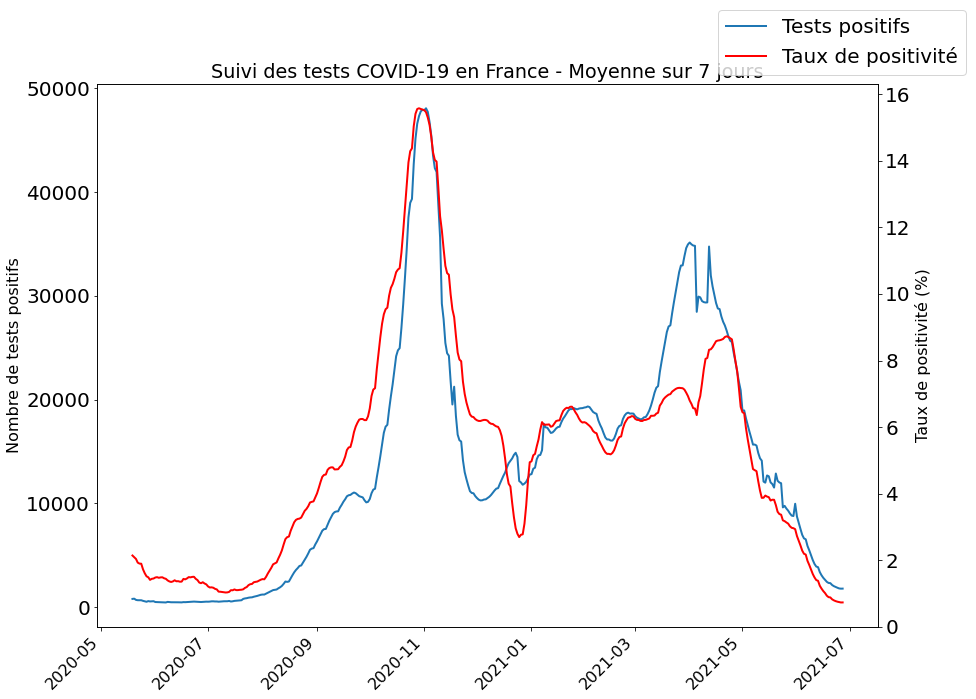

In [4]:
df_fra_all = df_fra[df_fra['cl_age90']==0]
#plotTests(df_fra, 'France', rolling=False)
plotTests(df_fra_all, 'France', departements, pre, leg, rolling=True)

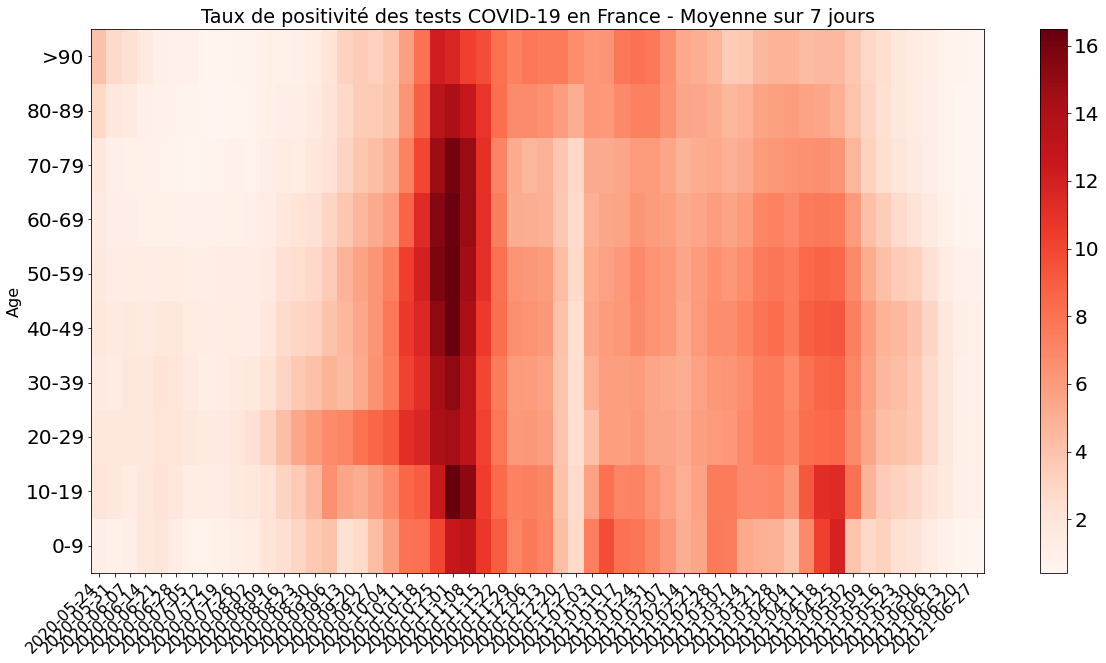

In [5]:
plotTestsVsAge(df_fra, 'France', departements, pre, leg)

### Puy-de-Dôme

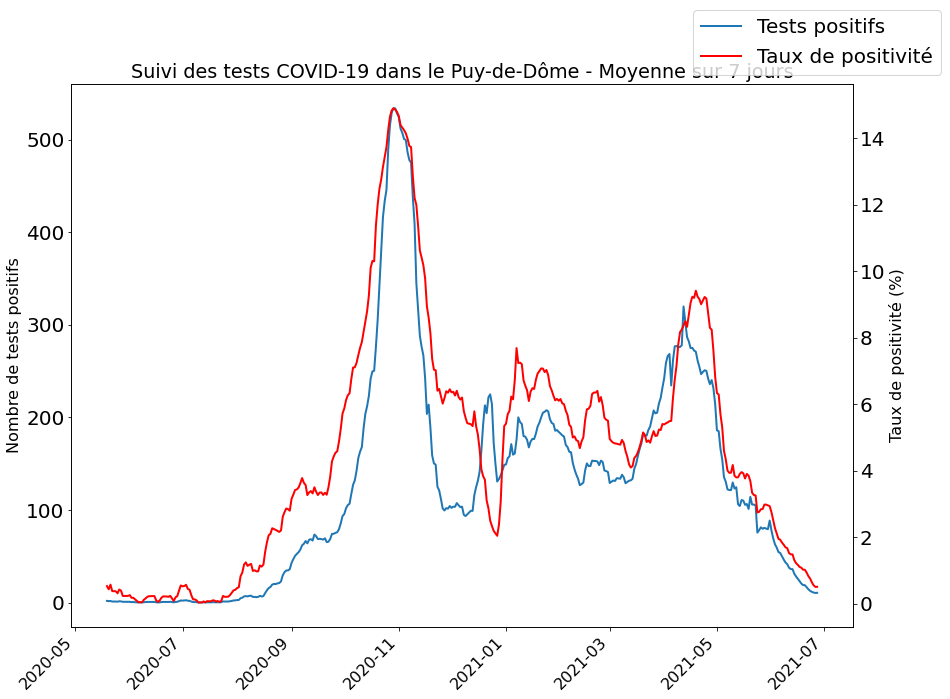

In [6]:
# Département spécifique
dep = '63'
df_dep_sel = df_dep[df_dep['dep']==dep]
df_dep_all = df_dep_sel[df_dep_sel['cl_age90']==0]
#plotTests(df_dep_all, dep, rolling=False)
plotTests(df_dep_all, dep, departements, pre, leg)

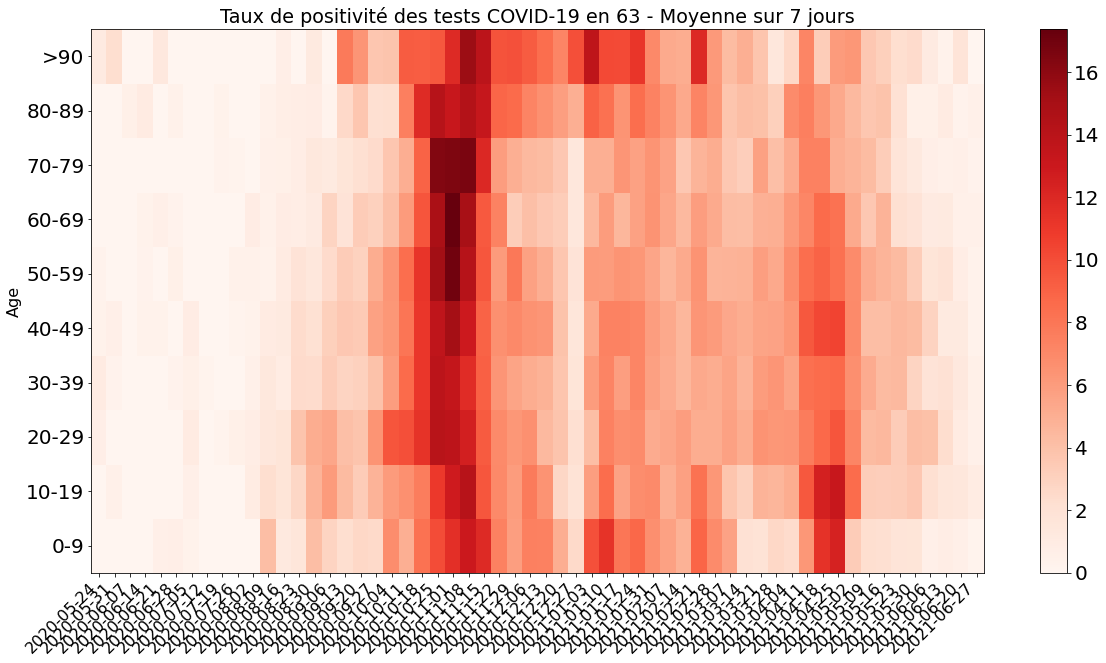

In [7]:
plotTestsVsAge(df_dep_sel, dep, departements, pre, leg)

## Suivi des hospitalisations et décès

### Récupération et préparation des données

In [1]:
#df_dep_all.tail(20)

In [9]:
df_hop = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7', sep=';', dtype={'dep':str})
df_hop = df_hop[df_hop['sexe']==0]
jour = df_hop['jour'].unique()

plt.rcParams["figure.figsize"] = [20, 9]

In [2]:
#df_hop['jour'].unique()

### France

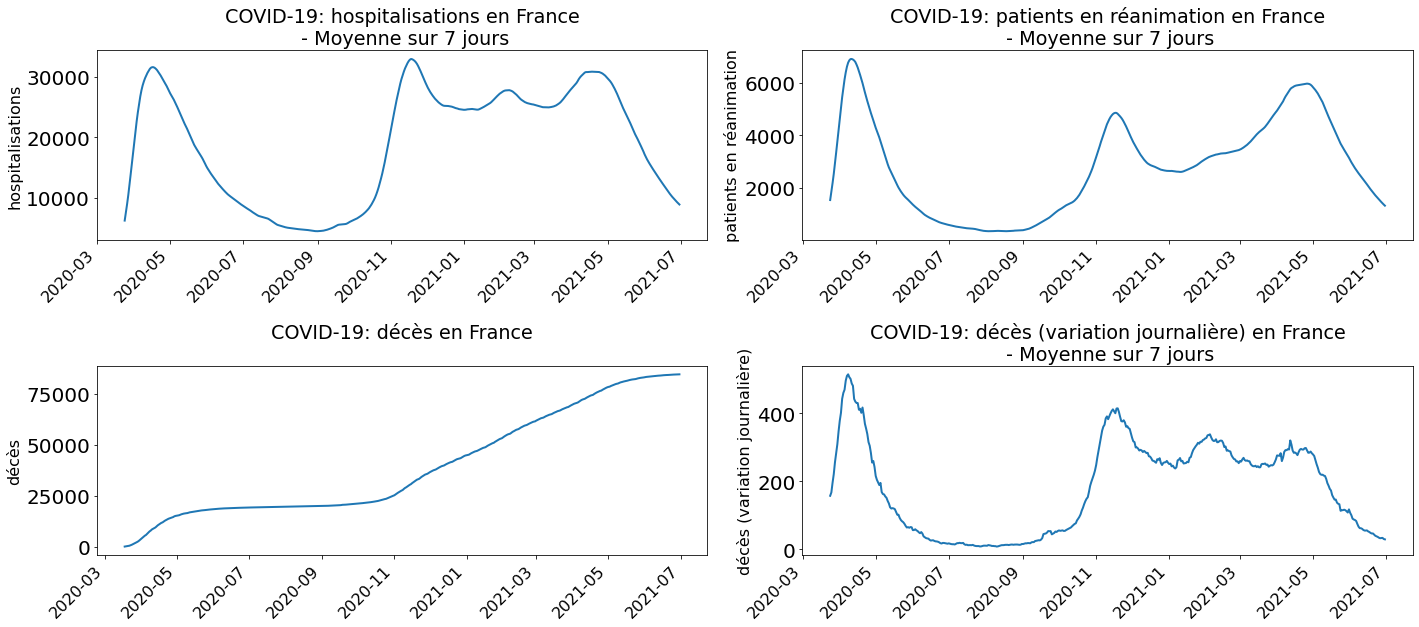

In [11]:
# France entière
a = [ df_hop[df_hop['jour']==j][['hosp','rea','rad','dc']].sum(axis=0) for j in jour ]
new_df = pd.DataFrame(data=a)
new_df['jour'] = jour
new_df['dc_jour'] = np.diff(new_df['dc'], prepend=0)

mask = [True, True, False, True]

for i, var in enumerate(['hosp', 'rea', 'dc', 'dc_jour']):
    plt.subplot(2, 2, i+1)
    plotEvol(new_df, var, 'France', departements, pre, leg, rolling=mask[i])
plt.tight_layout()

In [3]:
#new_df.tail(20)

### Puy-de-Dôme

<ipython-input-13-5607bba408f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hop_dep['dc_jour'] = np.diff(df_hop_dep['dc'], prepend=0)


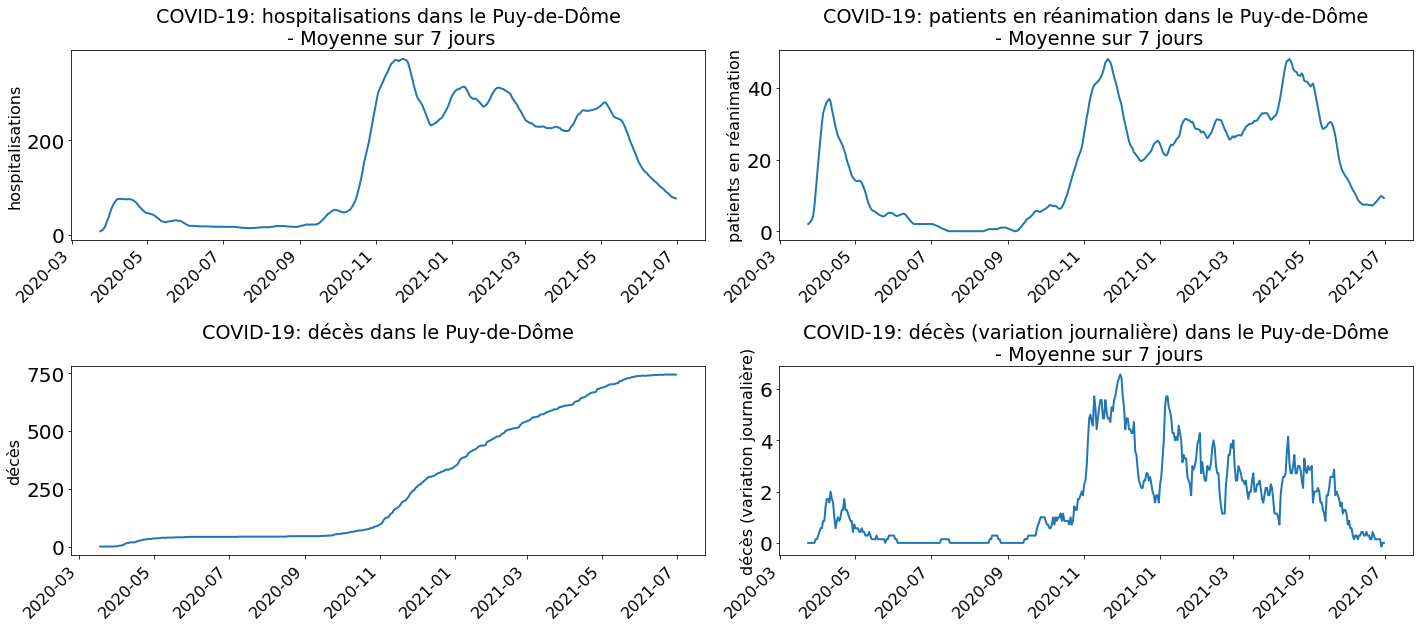

In [13]:
# Département spécifique
dep = '63'
df_hop_dep = df_hop[df_hop['dep']==dep]
df_hop_dep['dc_jour'] = np.diff(df_hop_dep['dc'], prepend=0)

for i, var in enumerate(['hosp', 'rea', 'dc', 'dc_jour']):
    plt.subplot(2, 2, i+1)
    plotEvol(df_hop_dep, var, dep, departements, pre, leg, rolling=mask[i])
plt.tight_layout()